### Environment Setup

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Statistical Tests
import scipy.stats as stats
from scipy.stats import norm
# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as dates
import seaborn as sns
from sklearn.model_selection import learning_curve
import datetime
pd.options.display.float_format = '{:20,.2f}'.format
import env

import wrangle

from wrangle import wrangle_video_games, split, seperate_y, scale_data, split_seperate_scale

In [2]:
from sklearn.cluster import KMeans


In [3]:
from math import sqrt

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [52]:
from sklearn.feature_selection import SelectKBest, f_regression

In [56]:
from sklearn.feature_selection import RFE

In [115]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

### Data Wrangling

In [5]:
df = wrangle_video_games()

In [6]:
df = wrangle.remove_dup_columns(df)

In [7]:
df.head()

,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,...,Shooter,Simulation,Sports,Strategy,AO,E,E10+,M,RP,T
447,PS3,2007,Role-Playing,1.69,0.85,0.14,0.43,3.10,93.00,45.00,...,0,0,0,0,0,0,0,1,0,0
450,X360,2010,Role-Playing,1.99,0.81,0.03,0.27,3.10,96.00,98.00,...,0,0,0,0,0,0,0,1,0,0
459,X360,2012,Shooter,1.89,0.88,0.04,0.25,3.05,89.00,59.00,...,1,0,0,0,0,0,0,1,0,0
461,X360,2008,Action,1.91,0.84,0.00,0.29,3.04,75.00,42.00,...,0,0,0,0,0,0,1,0,0,0
462,X360,2012,Role-Playing,1.94,0.84,0.03,0.24,3.04,93.00,74.00,...,0,0,0,0,0,0,0,1,0,0


In [8]:
df.shape

(7311, 46)

In [9]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test, train_scaled, validate_scaled, test_scaled = split_seperate_scale(df)

In [10]:
train.head()

,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,...,Shooter,Simulation,Sports,Strategy,AO,E,E10+,M,RP,T
9854,PS2,2003,Action,0.06,0.05,0.00,0.02,0.12,65.00,19.00,...,0,0,0,0,0,0,0,1,0,0
1478,X360,2013,Platform,0.86,0.34,0.00,0.12,1.32,83.00,37.00,...,0,0,0,0,0,0,1,0,0,0
1114,PS3,2007,Action,0.57,0.72,0.06,0.29,1.65,79.00,64.00,...,0,0,0,0,0,0,0,0,0,1
1846,WiiU,2013,Strategy,0.44,0.32,0.29,0.07,1.11,87.00,79.00,...,0,0,0,1,0,0,1,0,0,0
1982,PS2,2003,Sports,0.51,0.40,0.00,0.13,1.04,81.00,22.00,...,0,0,1,0,0,1,0,0,0,0


In [11]:
train.shape

(4093, 46)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4093 entries, 9854 to 7390
Data columns (total 46 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         4093 non-null   object 
 1   Year_of_Release  4093 non-null   int64  
 2   Genre            4093 non-null   object 
 3   NA_Sales         4093 non-null   float64
 4   EU_Sales         4093 non-null   float64
 5   JP_Sales         4093 non-null   float64
 6   Other_Sales      4093 non-null   float64
 7   Global_Sales     4093 non-null   float64
 8   Critic_Score     4093 non-null   float64
 9   Critic_Count     4093 non-null   float64
 10  User_Score       4093 non-null   float64
 11  Rating           4093 non-null   object 
 12  3DS              4093 non-null   uint8  
 13  DC               4093 non-null   uint8  
 14  DS               4093 non-null   uint8  
 15  GBA              4093 non-null   uint8  
 16  GC               4093 non-null   uint8  
 17  PC         

In [13]:
train.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,3DS,...,Shooter,Simulation,Sports,Strategy,AO,E,E10+,M,RP,T
count,"4,093.00","4,093.00","4,093.00","4,093.00","4,093.00","4,093.00","4,093.00","4,093.00","4,093.00","4,093.00",...,"4,093.00","4,093.00","4,093.00","4,093.00","4,093.00","4,093.00","4,093.00","4,093.00","4,093.00","4,093.00"
mean,"2,007.19",0.23,0.12,0.02,0.04,0.41,68.03,25.14,7.16,0.02,...,0.11,0.04,0.15,0.04,0.00,0.35,0.14,0.18,0.00,0.33
std,4.10,0.30,0.17,0.06,0.06,0.48,13.75,17.78,1.32,0.13,...,0.31,0.20,0.35,0.19,0.00,0.48,0.35,0.38,0.02,0.47
min,"1,992.00",0.00,0.00,0.00,0.00,0.01,19.00,3.00,0.60,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"2,004.00",0.05,0.01,0.00,0.01,0.09,59.00,11.00,6.70,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"2,007.00",0.12,0.04,0.00,0.02,0.22,70.00,21.00,7.20,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"2,010.00",0.29,0.15,0.00,0.05,0.53,79.00,35.00,8.10,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
max,"2,016.00",1.99,0.99,0.39,0.76,3.10,97.00,104.00,9.60,1.00,...,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00


### Cluster Modeling

In [14]:
# assign variable we will use in our model

X = train_scaled[['Global_Sales', 'Critic_Count', 'User_Score']]

X_validate = validate_scaled[['Global_Sales', 'Critic_Count', 'User_Score']]

X_test = test_scaled[['Global_Sales', 'Critic_Count', 'User_Score']]

## these features were chosen by both Select K Best and RFE

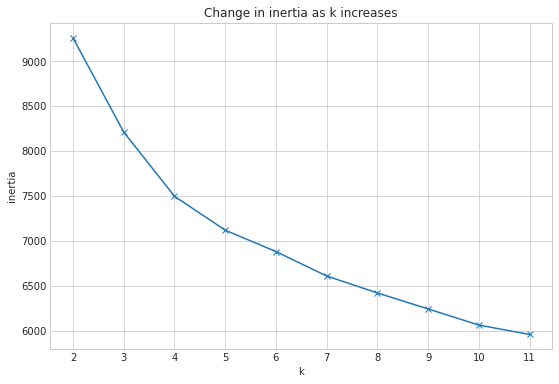

In [15]:
#plot inertia vs k to choose k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(train_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [16]:
## an appropriate k would be 7

kmeans = KMeans(n_clusters=7)

## make the model, n_clusters being how many clusters you want in your model 

kmeans.fit(X)

## fit the model to the fields you want to use in your model

kmeans.predict(X)
kmeans.predict(X_validate)
kmeans.predict(X_test)
## make your predictions

train_scaled['cluster'] = kmeans.predict(X)
validate_scaled['cluster'] = kmeans.predict(X_validate)
test_scaled['cluster'] = kmeans.predict(X_test)
## store the predictions as a column on your df

train['cluster'] = kmeans.predict(X)
validate['cluster'] = kmeans.predict(X_validate)
test['cluster'] = kmeans.predict(X_test)
## store the predictions as a column on your df

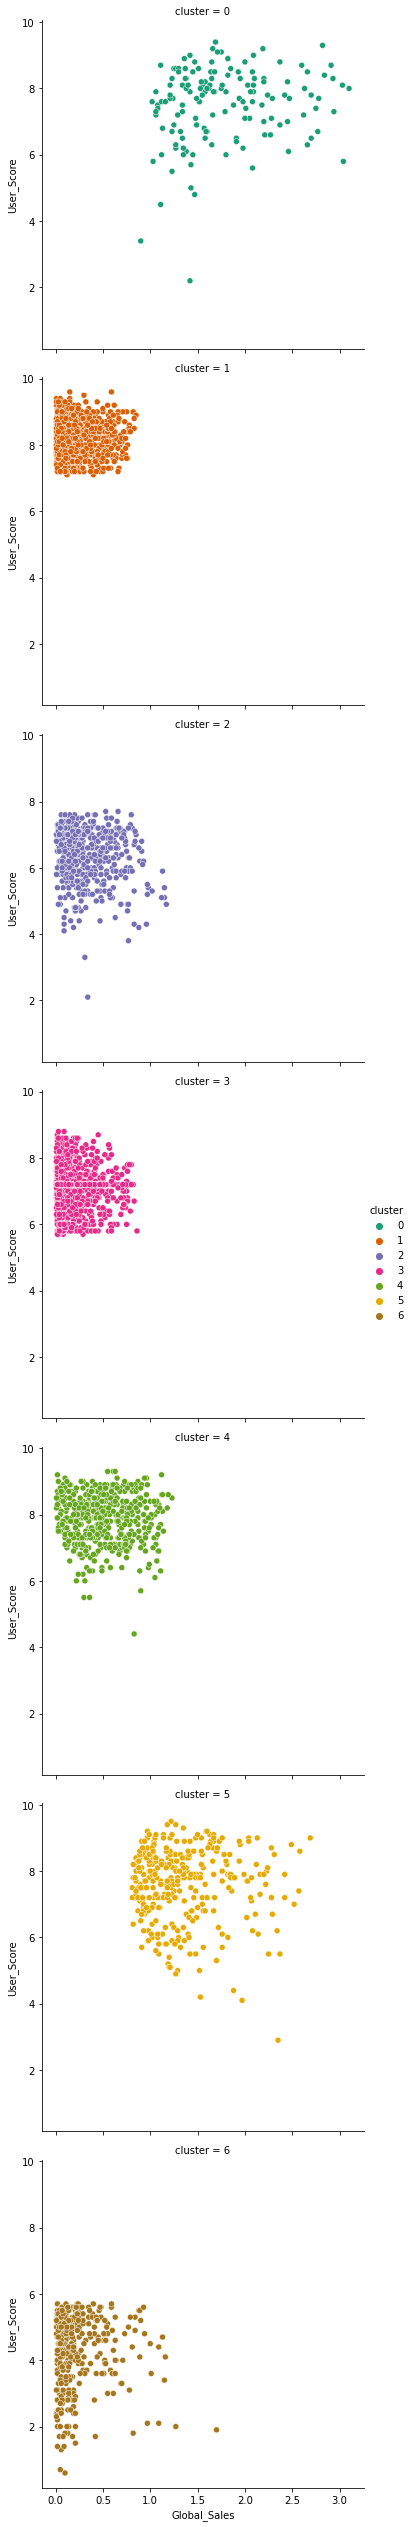

In [17]:
sns.relplot(data=train, x='Global_Sales', y='User_Score', hue='cluster', row = 'cluster', palette= 'Dark2')

<AxesSubplot:xlabel='cluster', ylabel='Critic_Score'>

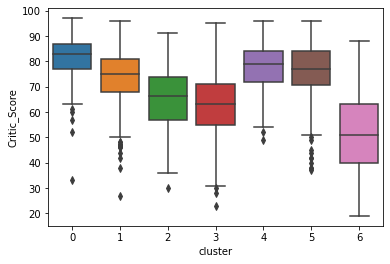

In [18]:
sns.boxplot(y=train.Critic_Score, x=train.cluster)


In [19]:
train.groupby('cluster').cluster.value_counts()

cluster  cluster
0        0           148
1        1           920
2        2           512
3        3          1332
4        4           469
5        5           339
6        6           373
Name: cluster, dtype: int64

#### Statisical Testing

- Cluster 0

In [20]:
H0 = 'There is no difference in the Critic Scores between Cluster 0 and the general population'

H1 = 'There is a difference in the Critic Scores between Cluster 0 and the general population'

alpha = .05

In [21]:
cluster0 = train[train.cluster == 0]

μ = train.Critic_Score.mean()
xbar = cluster0.Critic_Score.mean()
s = cluster0.Critic_Score.std()
n = cluster0.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)

print(p)

if p > alpha:
    print("We fail to reject the null hypothesis")
else:
    print(H1)

17.950974682008336
7.05166430972158e-39
There is a difference in the Critic Scores between Cluster 0 and the general population


In [22]:
cluster0.shape

(148, 47)

- Cluster 1

In [23]:
H0 = 'There is no difference in the Critic Scores between Cluster 1 and the general population'

H1 = 'There is a difference in the Critic Scores between Cluster 1 and the general population'

alpha = .05

In [24]:
cluster1 = train[train.cluster == 1]

μ = train.Critic_Score.mean()
xbar = cluster1.Critic_Score.mean()
s = cluster1.Critic_Score.std()
n = cluster1.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)

print(p)

if p > alpha:
    print("We fail to reject the null hypothesis")
else:
    print(H1)

17.78565206448416
4.8296376795977034e-61
There is a difference in the Critic Scores between Cluster 1 and the general population


In [25]:
cluster1.shape

(920, 47)

- Cluster 2

In [26]:
H0 = 'There is no difference in the Critic Scores between Cluster 2 and the general population'

H1 = 'There is a difference in the Critic Scores between Cluster 2 and the general population'

alpha = .05

In [27]:
cluster2 = train[train.cluster == 2]

μ = train.Critic_Score.mean()
xbar = cluster2.Critic_Score.mean()
s = cluster2.Critic_Score.std()
n = cluster2.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)

print(p)

if p > alpha:
    print("We fail to reject the null hypothesis")
else:
    print(H1)

-5.821035813476014
1.9999999896608578
We fail to reject the null hypothesis


In [28]:
cluster2.shape

(512, 47)

- Cluster 3

In [29]:
H0 = 'There is no difference in the Critic Scores between Cluster 3 and the general population'

H1 = 'There is a difference in the Critic Scores between Cluster 3 and the general population'

alpha = .05

In [30]:
cluster3 = train[train.cluster == 3]

μ = train.Critic_Score.mean()
xbar = cluster3.Critic_Score.mean()
s = cluster3.Critic_Score.std()
n = cluster3.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)

print(p)

if p > alpha:
    print("We fail to reject the null hypothesis")
else:
    print(H1)

-15.545198525357092
2.0
We fail to reject the null hypothesis


In [31]:
cluster3.shape

(1332, 47)

- Cluster 4

In [32]:
H0 = 'There is no difference in the Critic Scores between Cluster 4 and the general population'

H1 = 'There is a difference in the Critic Scores between Cluster 4 and the general population'

alpha = .05

In [33]:
cluster4 = train[train.cluster == 4]

μ = train.Critic_Score.mean()
xbar = cluster4.Critic_Score.mean()
s = cluster4.Critic_Score.std()
n = cluster4.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)

print(p)

if p > alpha:
    print("We fail to reject the null hypothesis")
else:
    print(H1)

24.128864487309976
3.5778329367714093e-84
There is a difference in the Critic Scores between Cluster 4 and the general population


In [34]:
cluster4.shape

(469, 47)

- Cluster 5

In [35]:
H0 = 'There is no difference in the Critic Scores between Cluster 5 and the general population'

H1 = 'There is a difference in the Critic Scores between Cluster 5 and the general population'

alpha = .05

In [36]:
cluster5 = train[train.cluster == 5]

μ = train.Critic_Score.mean()
xbar = cluster5.Critic_Score.mean()
s = cluster5.Critic_Score.std()
n = cluster5.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)

print(p)

if p > alpha:
    print("We fail to reject the null hypothesis")
else:
    print(H1)

13.414344441405097
3.4466984116343644e-33
There is a difference in the Critic Scores between Cluster 5 and the general population


In [37]:
cluster5.shape

(339, 47)

- Cluster 6

In [38]:
H0 = 'There is no difference in the Critic Scores between Cluster 6 and the general population'

H1 = 'There is a difference in the Critic Scores between Cluster 6 and the general population'

alpha = .05

In [39]:
cluster6 = train[train.cluster == 6]

μ = train.Critic_Score.mean()
xbar = cluster6.Critic_Score.mean()
s = cluster6.Critic_Score.std()
n = cluster6.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)

print(p)

if p > alpha:
    print("We fail to reject the null hypothesis")
else:
    print(H1)

-20.603497247958913
2.0
We fail to reject the null hypothesis


In [40]:
cluster6.shape

(373, 47)

# Regression Modeling

In [41]:
## First make features out of our clusters 

# train
dummy_df = pd.get_dummies(train['cluster'])

dummy_df.columns = ['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'cluster6']

train = pd.concat([train, dummy_df], axis=1)

# validate
dummy_df = pd.get_dummies(validate['cluster'])

dummy_df.columns = ['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'cluster6']

validate = pd.concat([validate, dummy_df], axis=1)

# test
dummy_df = pd.get_dummies(test['cluster'])

dummy_df.columns = ['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5', 'cluster6']

test = pd.concat([test, dummy_df], axis=1)

In [42]:
## Seperate Target Variable

X_train, y_train, X_validate, y_validate, X_test, y_test = seperate_y(train, validate, test)

In [43]:
## Scaled Data

train_scaled, validate_scaled, test_scaled = scale_data(X_train, X_validate, X_test)

### Establish Baseline

In [44]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

In [45]:
# 1. Predict Critic_Score_mean
Critic_Score_mean = y_train['Critic_Score'].mean()
y_train['Critic_Score_mean'] = Critic_Score_mean
y_validate['Critic_Score_mean'] = Critic_Score_mean

In [46]:
# 2. compute Critic_Score_median
Critic_Score_median = y_train['Critic_Score'].median()
y_train['Critic_Score_median'] = Critic_Score_median
y_validate['Critic_Score_median'] = Critic_Score_median

In [49]:
# 3. RMSE of Critic_Score_mean
rmse_train_mean = mean_squared_error(y_train.Critic_Score, y_train.Critic_Score_mean)**(1/2)
rmse_validate_mean = mean_squared_error(y_validate.Critic_Score, y_validate.Critic_Score_mean)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", rmse_train_mean, 
      "\nValidate/Out-of-Sample: ", rmse_validate_mean)

RMSE using Mean
Train/In-Sample:  13.748296292910208 
Validate/Out-of-Sample:  13.67784704951894


In [50]:
# 4. RMSE of logerror_median
rmse_train_median = mean_squared_error(y_train.Critic_Score, y_train.Critic_Score_median)**(1/2)
rmse_validate_median = mean_squared_error(y_validate.Critic_Score, y_validate.Critic_Score_median)**(1/2)

print("RMSE using Mean\nTrain/In-Sample: ", rmse_train_median, 
      "\nValidate/Out-of-Sample: ", rmse_validate_median)

RMSE using Mean
Train/In-Sample:  13.888574418895594 
Validate/Out-of-Sample:  13.792954144982287


### Feature Engineering

- Select K Best

In [54]:
# parameters: f_regression stats test, give me 8 features
f_selector = SelectKBest(f_regression, k=5)

# find the top 8 X's correlated with y
f_selector.fit(train_scaled, y_train['Critic_Score'])

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = train_scaled.iloc[:,feature_mask].columns.tolist()

f_feature

['NA_Sales', 'Global_Sales', 'Critic_Count', 'User_Score', 'cluster6']

- Recursive Feature Elimination

In [57]:
# initialize the ML algorithm
lm = LinearRegression()

# create the rfe object, indicating the ML object (lm) and the number of features I want to end up with. 
rfe = RFE(lm, 5)

# fit the data using RFE
rfe.fit(train_scaled,y_train['Critic_Score'])  

# get the mask of the columns selected
feature_mask = rfe.support_

# get list of the column names. 
rfe_feature = train_scaled.iloc[:,feature_mask].columns.tolist()

rfe_feature

['NA_Sales', 'Critic_Count', 'User_Score', 'DC', 'PC']

In [58]:
# view list of columns and their ranking

# get the ranks
var_ranks = rfe.ranking_
# get the variable names
var_names = train_scaled.columns.tolist()
# combine ranks and names into a df for clean viewing
rfe_ranks_df = pd.DataFrame({'Var': var_names, 'Rank': var_ranks})
# sort the df by rank
rfe_ranks_df.sort_values('Rank')

,Var,Rank
1,NA_Sales,1
6,Critic_Count,1
7,User_Score,1
13,PC,1
9,DC,1
24,XOne,2
40,RP,3
2,EU_Sales,4
34,Sports,5
43,cluster0,6


## LinearRegression (OLS)

In [59]:
# features chosen from variables selected by both SKB and RFE as well as 2 clusters found to be significant

features = ['Global_Sales', 'Critic_Count', 'User_Score', 'cluster6', 'cluster0']

In [60]:
# create the model object
lm = LinearRegression(normalize=True)

In [61]:
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(train_scaled[features], y_train.Critic_Score)

LinearRegression(normalize=True)

In [62]:
# predict train
y_train['Critic_Score_pred_lm'] = lm.predict(train_scaled[features])

y_train.head()

,Critic_Score,Critic_Score_mean,Critic_Score_median,Critic_Score_pred_lm
9854,65.00,68.03,70.00,58.18
1478,83.00,68.03,70.00,68.27
1114,79.00,68.03,70.00,83.97
1846,87.00,68.03,70.00,86.10
1982,81.00,68.03,70.00,79.83


In [63]:
# evaluate: rmse
rmse_train_lm = mean_squared_error(y_train.Critic_Score, y_train.Critic_Score_pred_lm)**(1/2)

rmse_train_lm

10.63069918169656

In [64]:
# predict validate
y_validate['Critic_Score_pred_lm'] = lm.predict(validate_scaled[features])

y_validate.head()

,Critic_Score,Critic_Score_mean,Critic_Score_median,Critic_Score_pred_lm
3616,78.00,68.03,70.00,76.59
12334,70.00,68.03,70.00,65.66
15169,63.00,68.03,70.00,53.44
16276,66.00,68.03,70.00,54.52
3560,78.00,68.03,70.00,69.64


In [65]:
# evaluate: rmse
rmse_validate_lm = mean_squared_error(y_validate.Critic_Score, y_validate.Critic_Score_pred_lm)**(1/2)

rmse_validate_lm

10.280187529117429

In [66]:
print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train_lm, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lm)

RMSE for OLS using LinearRegression
Training/In-Sample:  10.63069918169656 
Validation/Out-of-Sample:  10.280187529117429


#### Takeaways

- this model does much better on train and validate than the baseline

## LassoLars

In [69]:
# create the model object
lars = LassoLars(alpha=1.0)

In [70]:
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(train_scaled[features], y_train.Critic_Score)

LassoLars()

In [72]:
# predict train
y_train['Critic_Score_pred_lars'] = lars.predict(X_train[features])

y_train.head()

,Critic_Score,Critic_Score_mean,Critic_Score_median,Critic_Score_pred_lm,Critic_Score_pred_lars
9854,65.00,68.03,70.00,58.18,68.03
1478,83.00,68.03,70.00,68.27,68.03
1114,79.00,68.03,70.00,83.97,68.03
1846,87.00,68.03,70.00,86.10,68.03
1982,81.00,68.03,70.00,79.83,68.03


In [73]:
# evaluate: rmse
rmse_train_lars = mean_squared_error(y_train.Critic_Score, y_train.Critic_Score_pred_lars)**(1/2)

rmse_train_lars

13.748296292910208

In [75]:
# predict validate
y_validate['Critic_Score_pred_lars'] = lars.predict(X_validate[features])

y_validate.head()

,Critic_Score,Critic_Score_mean,Critic_Score_median,Critic_Score_pred_lm,Critic_Score_pred_lars
3616,78.00,68.03,70.00,76.59,68.03
12334,70.00,68.03,70.00,65.66,68.03
15169,63.00,68.03,70.00,53.44,68.03
16276,66.00,68.03,70.00,54.52,68.03
3560,78.00,68.03,70.00,69.64,68.03


In [76]:
# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validate.Critic_Score, y_validate.Critic_Score_pred_lars)**(1/2)

rmse_validate_lars

13.67784704951894

In [77]:
print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train_lars, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lars)

RMSE for Lasso + Lars
Training/In-Sample:  13.748296292910208 
Validation/Out-of-Sample:  13.67784704951894


#### Takeaways

- While this model does better than the baseline, it does not outperform OLS

## TweedieRegressor (GLM)

<AxesSubplot:>

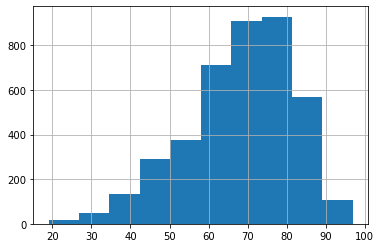

In [78]:
y_train.Critic_Score.hist()

In [79]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

In [80]:
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(train_scaled[features], y_train.Critic_Score)

TweedieRegressor(alpha=0, power=1)

In [81]:
# predict train
y_train['Critic_Score_pred_glm'] = glm.predict(train_scaled[features])

y_train.head()

,Critic_Score,Critic_Score_mean,Critic_Score_median,Critic_Score_pred_lm,Critic_Score_pred_lars,Critic_Score_pred_glm
9854,65.00,68.03,70.00,58.18,68.03,58.64
1478,83.00,68.03,70.00,68.27,68.03,67.37
1114,79.00,68.03,70.00,83.97,68.03,84.24
1846,87.00,68.03,70.00,86.10,68.03,87.00
1982,81.00,68.03,70.00,79.83,68.03,80.33


In [84]:
# evaluate: rmse
rmse_train_glm = mean_squared_error(y_train.Critic_Score, y_train.Critic_Score_pred_glm)**(1/2)

rmse_train_glm

10.662557498577282

In [83]:
# predict validate
y_validate['Critic_Score_pred_glm'] = glm.predict(validate_scaled[features])

y_validate.head()

,Critic_Score,Critic_Score_mean,Critic_Score_median,Critic_Score_pred_lm,Critic_Score_pred_lars,Critic_Score_pred_glm
3616,78.00,68.03,70.00,76.59,68.03,76.90
12334,70.00,68.03,70.00,65.66,68.03,65.59
15169,63.00,68.03,70.00,53.44,68.03,52.85
16276,66.00,68.03,70.00,54.52,68.03,55.70
3560,78.00,68.03,70.00,69.64,68.03,69.32


In [85]:
# evaluate: rmse
rmse_validate_glm= mean_squared_error(y_validate.Critic_Score, y_validate.Critic_Score_pred_glm)**(1/2)

rmse_validate_glm

10.316103282898425

In [86]:
print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train_glm, 
      "\nValidation/Out-of-Sample: ", rmse_validate_glm)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  10.662557498577282 
Validation/Out-of-Sample:  10.316103282898425


#### Takeaways

- This model did very will, however the LM barely performed better on the unseen validate data

## Polynomial Regression

- PolynomialFeatures

In [88]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train[features])

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate[features])
X_test_degree2 = pf.transform(X_test[features])

- LinearRegression

In [89]:
# create the model object
lm2 = LinearRegression(normalize=True)

In [92]:
# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.Critic_Score)

LinearRegression(normalize=True)

In [100]:
# predict train
y_train['Critic_Score_pred_lm2'] = lm2.predict(X_train_degree2)

y_train.head()

,Critic_Score,Critic_Score_mean,Critic_Score_median,Critic_Score_pred_lm,Critic_Score_pred_lars,Critic_Score_pred_glm,logerror_pred_lm2,Critic_Score_pred_lm2
9854,65.00,68.03,70.00,58.18,68.03,58.64,58.62,58.62
1478,83.00,68.03,70.00,68.27,68.03,67.37,71.20,71.20
1114,79.00,68.03,70.00,83.97,68.03,84.24,84.80,84.80
1846,87.00,68.03,70.00,86.10,68.03,87.00,86.58,86.58
1982,81.00,68.03,70.00,79.83,68.03,80.33,81.11,81.11


In [101]:
# evaluate: rmse
rmse_train_lm2 = mean_squared_error(y_train.Critic_Score, y_train.Critic_Score_pred_lm2)**(1/2)

rmse_train_lm2

10.507150809937295

In [102]:
# predict validate
y_validate['Critic_Score_pred_lm2'] = lm2.predict(X_validate_degree2)

y_validate.head()

,Critic_Score,Critic_Score_mean,Critic_Score_median,Critic_Score_pred_lm,Critic_Score_pred_lars,Critic_Score_pred_glm,logerror_pred_lm2,Critic_Score_pred_lm2
3616,78.00,68.03,70.00,76.59,68.03,76.90,78.61,78.61
12334,70.00,68.03,70.00,65.66,68.03,65.59,65.08,65.08
15169,63.00,68.03,70.00,53.44,68.03,52.85,53.14,53.14
16276,66.00,68.03,70.00,54.52,68.03,55.70,53.50,53.50
3560,78.00,68.03,70.00,69.64,68.03,69.32,70.10,70.10


In [103]:
# evaluate: rmse
rmse_validate_lm2 = mean_squared_error(y_validate.Critic_Score, y_validate.Critic_Score_pred_lm2)**(1/2)

rmse_validate_lm2

10.15112718451599

In [104]:
print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train_lm2, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lm2)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  10.507150809937295 
Validation/Out-of-Sample:  10.15112718451599


#### Takeaways

- This model outperforms the baseline and does marginally better on the unseen validate data than OLS

# Evaluation

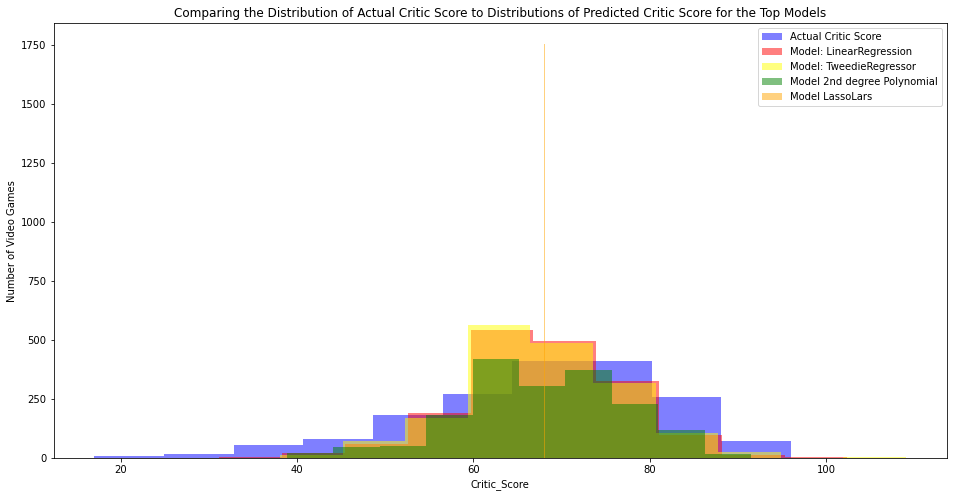

In [109]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.Critic_Score, color='blue', alpha=.5, label="Actual Critic Score")
plt.hist(y_validate.Critic_Score_pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.Critic_Score_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.Critic_Score_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
plt.hist(y_validate.Critic_Score_pred_lars, color='orange', alpha=.5, label="Model LassoLars")


plt.xlabel("Critic_Score")
plt.ylabel("Number of Video Games")
plt.title("Comparing the Distribution of Actual Critic Score to Distributions of Predicted Critic Score for the Top Models")
plt.legend()

plt.show()

#### Takeaways

- Linear and Tweedie look almost identical

- Polynomial has the furthest spread of values

- LassoLars appears to have just predicted the median

Text(0.5, 1.0, 'Model: Polynomial Regresser')

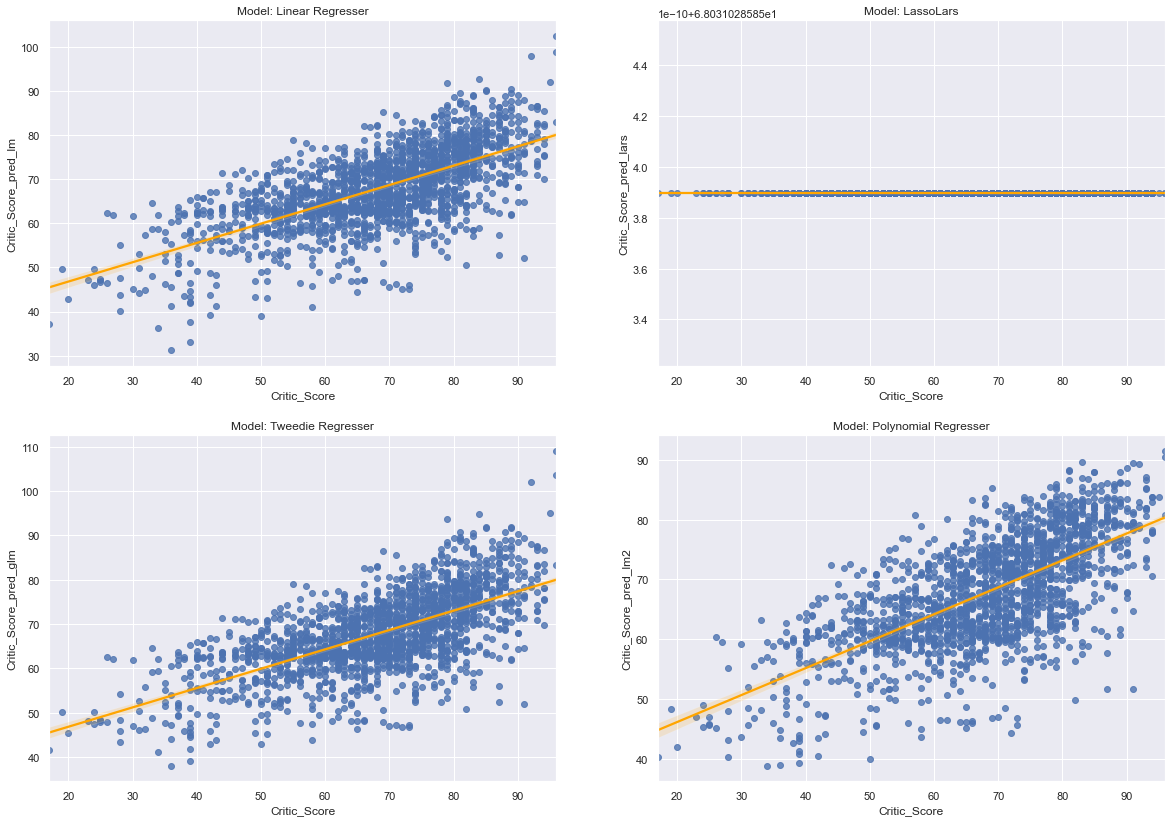

In [111]:
plt.subplots(2, 2, figsize=(20, 14), sharey=True)
sns.set(style="darkgrid")
plt.subplot(2,2,1)
sns.regplot(x= y_validate.Critic_Score, y= y_validate.Critic_Score_pred_lm, line_kws={"color": "orange"})
plt.title("Model: Linear Regresser")
plt.subplot(2,2,2)
sns.regplot(x= y_validate.Critic_Score, y= y_validate.Critic_Score_pred_lars, line_kws={"color": "orange"})
plt.title("Model: LassoLars")
plt.subplot(2,2,3)
sns.regplot(x= y_validate.Critic_Score, y= y_validate.Critic_Score_pred_glm, line_kws={"color": "orange"})
plt.title("Model: Tweedie Regresser")
plt.subplot(2,2,4)
sns.regplot(x= y_validate.Critic_Score, y= y_validate.Critic_Score_pred_lm2, line_kws={"color": "orange"}) 
plt.title("Model: Polynomial Regresser")

#### Takeaways 

- Other than Lasso, most models appear to follow the trendline

- Polynomial appears to have the stronged y = x trend, visually

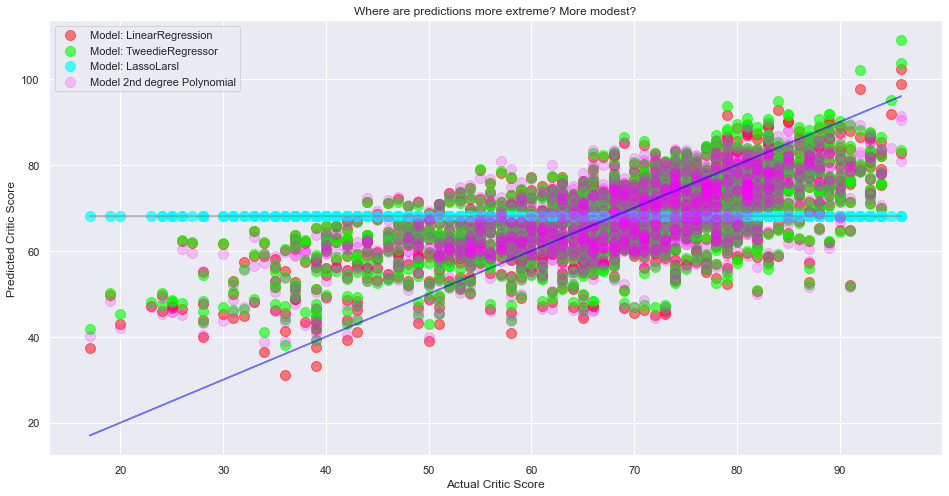

In [112]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.Critic_Score, y_validate.Critic_Score_mean, alpha=.5, color="gray", label='_nolegend_')

plt.plot(y_validate.Critic_Score, y_validate.Critic_Score, alpha=.5, color="blue", label='_nolegend_')

plt.scatter(y_validate.Critic_Score, y_validate.Critic_Score_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.Critic_Score, y_validate.Critic_Score_pred_glm, 
            alpha=.6, color="lime", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.Critic_Score, y_validate.Critic_Score_pred_lars, 
            alpha=.7, color="cyan", s=100, label="Model: LassoLarsl")
plt.scatter(y_validate.Critic_Score, y_validate.Critic_Score_pred_lm2, 
            alpha=.2, color="magenta", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Critic Score")
plt.ylabel("Predicted Critic Score")
plt.title("Where are predictions more extreme? More modest?")

plt.show()

#### Takeaways

- Once again most models look very similar, but they all follow the same trend

- However, the lower the actual Critic Score the more our models over value the prediction

- Inversely with video games with high Critic Scores my models appear to under value the predictions

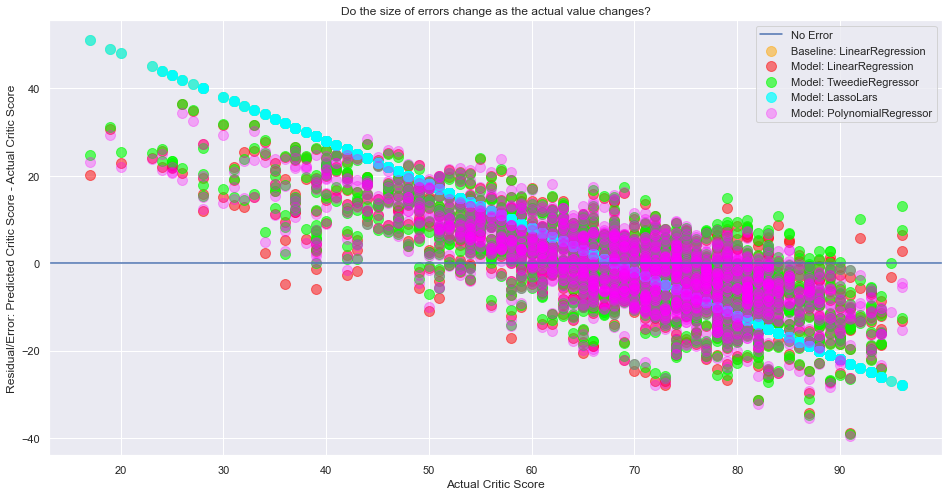

In [113]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")

plt.scatter(y_validate.Critic_Score, y_validate.Critic_Score_mean - y_validate.Critic_Score , 
            alpha=.5, color="orange", s=100, label="Baseline: LinearRegression")
plt.scatter(y_validate.Critic_Score, y_validate.Critic_Score_pred_lm - y_validate.Critic_Score , 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.Critic_Score, y_validate.Critic_Score_pred_glm - y_validate.Critic_Score, 
            alpha=.6, color="lime", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.Critic_Score, y_validate.Critic_Score_pred_lars - y_validate.Critic_Score , 
            alpha=.7, color="cyan", s=100, label="Model: LassoLars")
plt.scatter(y_validate.Critic_Score, y_validate.Critic_Score_pred_lm2 - y_validate.Critic_Score , 
            alpha=.3, color="magenta", s=100, label="Model: PolynomialRegressor")
plt.legend()
plt.xlabel("Actual Critic Score")
plt.ylabel("Residual/Error: Predicted Critic Score - Actual Critic Score")
plt.title("Do the size of errors change as the actual value changes?")
plt.show()

#### Takeaways 

- Games with low Critic Scores have more positive residuals

- Games with high Critic Scores have more negative residuals

In [114]:
# predict on test
y_test['Critic_Score_pred_lm2'] = lm2.predict(X_test_degree2)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.Critic_Score, y_test.Critic_Score_pred_lm2)**(1/2)

print("RMSE for OLS Model using Polynomial Regression\nOut-of-Sample Performance: ", rmse_test)

RMSE for OLS Model using Polynomial Regression
Out-of-Sample Performance:  10.307850865237787


- My final model outperforms the baseline on unseen test data

### R^2

In [116]:
r2_score(y_train.Critic_Score, y_train.Critic_Score_pred_lm2)

0.41592022891531577

In [117]:
r2_score(y_validate.Critic_Score, y_validate.Critic_Score_pred_lm2)

0.4491041042027385

In [118]:
r2_score(y_test.Critic_Score, y_test.Critic_Score_pred_lm2)

0.4321378655451781

- My final model appears to explain approx 40% of variance within the data

    - Cetrainly room for improvement in future implementations